In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import jieba.posseg as psg


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
reviews = pd.read_csv(r'D:\Crawler\51job\会计page1-13.csv', encoding='gb18030')

In [3]:
reviews.dropna(inplace=True)
reviews.drop_duplicates()
reviews.shape

(516, 10)

In [4]:
print(reviews.shape)
reviews.head()

(516, 10)


,职位名称,公司名称,薪酬,城市地区,学历要求,工作经验要求,公司福利,公司标签,职位描述或任职要求,规模类型
3,主办会计,杭州西奥电梯现代化更新有限公司,5千-1万,宁波,大专,1年经验,财务,原材料和加工,任职资格1、大专以上学历，会计相关专业.2、1年以上工作经验，优秀应届毕业生亦可,民营 | 500-1000人
4,会计,深圳市兴一欣欣控股有限公司,4-8千,合肥-长丰县,本科,1年经验,会计,专业服务(咨询、人力资源、财会),岗位描述：储备，财务部各个岗位轮岗。任职资格：1.***本科及以上学历，会计、财务等相关专业...,民营 | 150-500人
6,会计+双休,陕西中睿实业有限公司,6-8千,昆山,大专,3-4年经验,财务,建筑/建材/工程,会计任职要求：1.财务、会计或相关专业专科以上学历，持有会计人员上岗证；2.具有3年以上财会...,民营 | 少于50人
7,总账会计,湘潭牵引机车厂有限公司,6-9千,宁波-余姚市,本科,1年经验,泸州巴蜀液酒业（集团）有限公司,制药/生物工程,1.负责业务的会计凭证编制2.负责公司对外税务工作3.负责财务工作的审核4.负责成本核算及结...,已上市 | 1000-5000人
8,成本会计,苏州莱能士光电科技股份有限公司,8-10万/年,成都,大专,无需经验,绩效奖金,专业服务(咨询、人力资源、财会),职位名称：会计、主管会计、会计助理、会计专员用人部门：会计部招聘人数：10人用人计划：202...,民营 | 少于50人


In [5]:
content = reviews['职位描述或任职要求']

In [6]:
content

3               任职资格1、大专以上学历，会计相关专业.2、1年以上工作经验，优秀应届毕业生亦可
4      岗位描述：储备，财务部各个岗位轮岗。任职资格：1.***本科及以上学历，会计、财务等相关专业...
6      会计任职要求：1.财务、会计或相关专业专科以上学历，持有会计人员上岗证；2.具有3年以上财会...
7      1.负责业务的会计凭证编制2.负责公司对外税务工作3.负责财务工作的审核4.负责成本核算及结...
8      职位名称：会计、主管会计、会计助理、会计专员用人部门：会计部招聘人数：10人用人计划：202...
                             ...                        
645    1、审核业务部门提供的付款申请，审核发票合规、付款账期、相关审批手续完成，根据付款条件和付款...
647    岗位职责：1、负责应付款、能源消耗、产量统计及财务状况等数据的统计并按时提交相关报表；2、负...
648    职位描述1、编制会计凭证，登记明细帐、总分类帐及财务监控；2、费用审核、工薪分摊、计提核算税...
651    1、负责公司会计核算工作，保证公司会计核算工作准确性和及时性2、负责日常报销、付款审核，往来...
652    1、负责公司财务报关，上税，做账，退税等相关工作。2、根据公司实际情况申请国家政策补贴，对国...
Name: 职位描述或任职要求, Length: 516, dtype: object

In [7]:
strinfo = re.compile('[0-9a-zA-Z]|职位描述|岗位职责|任职要求|职位描述及要求|工作职责|岗位要求|精通|熟悉|负责|开发|工作|节假日|经验|相关|能力|福利|公司|优先')
content = content.apply(lambda x: strinfo.sub('',x))

In [8]:
worker = lambda s: [(x.word, x.flag) for x in psg.cut(s)] # 自定义简单分词函数
seg_word = content.apply(worker)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.007 seconds.
Prefix dict has been built successfully.


In [9]:
seg_word.head()

3    [(任职, v), (资格, n), (、, x), (大专, n), (以上学历, l),...
4    [(岗位, n), (描述, v), (：, x), (储备, vn), (，, x), (...
6    [(会计, v), (：, x), (., x), (财务, n), (、, x), (会计...
7    [(., x), (业务, n), (的, uj), (会计凭证, n), (编制, v),...
8    [(职位, n), (名称, n), (：, x), (会计, v), (、, x), (主...
Name: 职位描述或任职要求, dtype: object

In [10]:
type(seg_word)
type(list(seg_word))

list

In [11]:
# 将词语转为数据框形式，一列是词，一列是词语所在的句子ID，最后一列是词语在该句子的位置
n_word = seg_word.apply(lambda x: len(x))  # 每一评论中词的个数

n_content = [[x+1]*y for x,y in zip(list(seg_word.index), list(n_word))]

# 将嵌套的列表展开，作为词所在评论的id
index_content = sum(list(n_content), [])
# seg_word = list(seg_word)

In [12]:
seg_word = sum(seg_word, [])
# 词性
word = [x[0] for x in seg_word]
# 词性
nature = [x[1] for x in seg_word]

# content_type = [[x]*y for x,y in zip(list(reviews['content_type']), list(n_word))]
# # 评论类型
# content_type = sum(content_type, [])

result = pd.DataFrame({"index_content":index_content,
                       "word":word,
                       "nature":nature,
                       # "content_type":content_type
                       })

In [13]:
# 删除标点符号
result = result[result['nature'] != 'x']  # x表示标点符号

# 删除停用词
stop_path = open(r"D:\DL_Homework\NLP\Data\电商产品评论数据情感分析\stoplist.txt",encoding='UTF-8')
stop = stop_path.readlines()
stop = [x.replace('\n', '') for x in stop]
word = list(set(word) - set(stop))
result = result[result['word'].isin(word)]

In [14]:
result.head()

,index_content,word,nature
0,4,任职,v
1,4,资格,n
3,4,大专,n
4,4,以上学历,l
6,4,会计专业,n


In [15]:
# 构造各词在对应评论的位置列
n_word = list(result.groupby(by = ['index_content'])['index_content'].count())
index_word = [list(np.arange(0, y)) for y in n_word]
# 词语在该评论的位置
index_word = sum(index_word, [])
# 合并评论id
result['index_word'] = index_word

result.head()

,index_content,word,nature,index_word
0,4,任职,v,0
1,4,资格,n,1
3,4,大专,n,2
4,4,以上学历,l,3
6,4,会计专业,n,4


In [16]:
# # 提取含有名词类的评论,即词性含有“n”的评论
# ind_n = result[['n' in x for x in result['nature']]]['index_content'].unique()
# result_n = result[[x in ind_n for x in result['index_content']]]
# result_n.head()

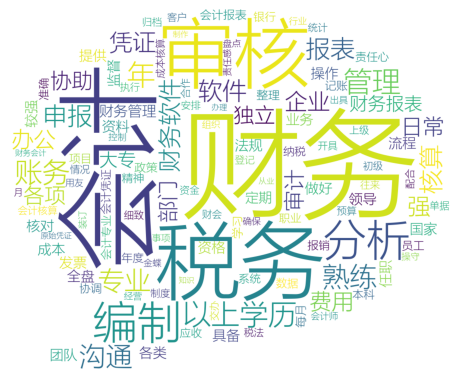

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

frequencies = result.groupby('word')['word'].count()
frequencies = frequencies.sort_values(ascending = False)
backgroud_Image=plt.imread('D:\DL_Homework\\NLP\Data\电商产品评论数据情感分析\pl.jpg')

# 自己上传中文字体到kesci
font_path = 'D:\DL_Homework\\NLP\Data\电商产品评论数据情感分析\MSYHL.TTC'
wordcloud = WordCloud(font_path=font_path, # 设置字体，不设置就会出现乱码
                      max_words=120,
                      background_color='white',
                      mask=backgroud_Image)# 词云形状

my_wordcloud = wordcloud.fit_words(frequencies)
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()